In [275]:
import pandas as pd
import numpy as np
import os
from io import StringIO

import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

import pydotplus

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

os.getcwd()



'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [2]:
raw_df = pd.read_csv('../data/input/SurveyReport-rawdata_20200702_deduped.csv')  

In [3]:
[x for x in raw_df.columns]

['Response ID',
 'IP Address',
 'Timestamp (mm/dd/yyyy)',
 'Duplicate',
 'Time Taken to Complete (Seconds)',
 'Seq. Number',
 'External Reference',
 'Custom Variable 1',
 'Custom Variable 2',
 'Custom Variable 3',
 'Custom Variable 4',
 'Custom Variable 5',
 'Respondent Email',
 'Email List',
 'Country Code',
 'Region',
 'Pique Solutions, an independent analyst firm, is conducting research sponsored by Oracle among selected IT professionals at leading organizations. The objective of this survey is to gather your feedback related to your Oracle Java SE Subscription experience in order to improve the service based on your feedback.Your input will be shared with Oracle in an aggregate format, and neither your name nor your company’s name will be associated with your comments without your explicit consent. We would like to talk with you about the benefits and shortcomings of your Oracle Java SE Subscription, and the considerations behind your selection of Oracle Java SE.First, please respo

In [120]:
ind_demog_vars = ['What is your job title? ']
com_demog_vars = ['Which one of the below best describes your company’s industry grouping? ',
                  'What is the approximate annual revenue of your company? ',
                 'Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or candidate for political office?']
com_java_vars = ['How long has your organization been using Oracle Java SE Subscription for managing your Java applications? ',
                 'How many Java applications does your organization plan to build or deploy in 2020? ',
                'Do you outsource a significant portion of your organization’s application development function? ',
                 'Approximately how many Java developers are in your organization?\xa0',
                "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Java",
 "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JVM languages besides Java",
 "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms       % developing on Python",
 "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms   % developing on JavaScript",
                'Which platform does your organization primarily develop for?',
                'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (RHEL)',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (Oracle)',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux Ubuntu',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (SUSE)',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (Other) *',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  MacOS',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Solaris',
 'Please provide approximate percentage(s) for each of the development platforms listed below.  Windows',
 'Can you please specify Linux (Other)?',
                'Eclipse IDE Level of use (0-10)\xa0[ , ]',
 'Eclipse IDE Level of satisfaction (0-10)[ , ]',
 'IntelliJ IDE Level of use (0-10)\xa0[ , ]',
 'IntelliJ IDE Level of satisfaction (0-10)[ , ]',
 'JDeveloper Level of use (0-10)\xa0[ , ]',
 'JDeveloper Level of satisfaction (0-10)[ , ]',
 'NetBeans IDE Level of use (0-10)\xa0[ , ]',
 'NetBeans IDE Level of satisfaction (0-10)[ , ]',
 'Rational Application Developer Level of use (0-10)\xa0[ , ]',
 'Rational Application Developer Level of satisfaction (0-10)[ , ]',
 'Visual Studio Level of use (0-10)\xa0[ , ]',
 'Visual Studio Level of satisfaction (0-10)[ , ]',
 'Other * Level of use (0-10)\xa0[ , ]',
 'Other * Level of satisfaction (0-10)[ , ]',
 'Can you please specify?']
ind_java_vars = ['Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one)']

In [6]:
oracle_spec_vars = ['Oracle Java SE Advanced Management Console (AMC) Usage (0-10)[\xa0,\xa0]',
 'Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE Usage Logging in AMC Usage (0-10)[\xa0,\xa0]',
 'Java SE Usage Logging in AMC Satisfaction (0-10)[\xa0,\xa0]',
 'The Java SE Deployment Rule Set Usage (0-10)[\xa0,\xa0]',
 'The Java SE Deployment Rule Set Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE MSI Customizations Tools  Usage (0-10)[\xa0,\xa0]',
 'Java SE MSI Customizations Tools  Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE Flight Recorder Usage (0-10)[\xa0,\xa0]',
 'Java SE Flight Recorder Satisfaction (0-10)[\xa0,\xa0]',
 'Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it? ',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Oracle websites',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Oracle Sales professionals',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Oracle marketing materials',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Blogs',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  External consultants',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Social Media outlets (e.g. Twitter, LinkedIn, Facebook, etc.)',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  User communities',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Industry publications',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Peers’ recommendations',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Other *',
 'On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription.  Other * [Can you please specify?]',
 'Oracle’s continued investment in the Java Ecosystem and Technology Importance (0-10)[ , ]',
 'Oracle’s continued investment in the Java Ecosystem and Technology Satisfaction (0-10)[ , ]',
 'Patches and updates for older versions of Java Importance (0-10)[ , ]',
 'Patches and updates for older versions of Java Satisfaction (0-10)[ , ]',
 'Tools and updates for desktop management specifically using Java Web Start Importance (0-10)[ , ]',
 'Tools and updates for desktop management specifically using Java Web Start Satisfaction (0-10)[ , ]',
 'Tools and updates for desktop management independently of Java Web Start / Browsers Importance (0-10)[ , ]',
 'Tools and updates for desktop management independently of Java Web Start / Browsers Satisfaction (0-10)[ , ]',
 'Access to tools for automated updates and upgrade, desktop deployment rulesets and tools for Java version management  Importance (0-10)[ , ]',
 'Access to tools for automated updates and upgrade, desktop deployment rulesets and tools for Java version management  Satisfaction (0-10)[ , ]',
 'Monitoring tools Importance (0-10)[ , ]',
 'Monitoring tools Satisfaction (0-10)[ , ]',
 'MOS (My Oracle Support) Importance (0-10)[ , ]',
 'MOS (My Oracle Support) Satisfaction (0-10)[ , ]',
 'Access Cloud Workload and On-premise Importance (0-10)[ , ]',
 'Access Cloud Workload and On-premise Satisfaction (0-10)[ , ]',
 'Flexible licensing terms  Importance (0-10)[ , ]',
 'Flexible licensing terms  Satisfaction (0-10)[ , ]',
 'Legacy Java application support Importance (0-10)[ , ]',
 'Legacy Java application support Satisfaction (0-10)[ , ]',
 'Other * Importance (0-10)[ , ]',
 'Other * Satisfaction (0-10)[ , ]',
 'Can you please specify?.1',
 'Methods of communication Importance (0-10)[\xa0,\xa0]',
 'Methods of communication Satisfaction (0-10)[\xa0,\xa0]',
 'Quality of phone support Importance (0-10)[\xa0,\xa0]',
 'Quality of phone support Satisfaction (0-10)[\xa0,\xa0]',
 'Knowledge of support staff Importance (0-10)[\xa0,\xa0]',
 'Knowledge of support staff Satisfaction (0-10)[\xa0,\xa0]',
 'Oracles understanding of your companys needs Importance (0-10)[\xa0,\xa0]',
 'Oracles understanding of your companys needs Satisfaction (0-10)[\xa0,\xa0]',
 'Quality of training provided to your staff Importance (0-10)[\xa0,\xa0]',
 'Quality of training provided to your staff Satisfaction (0-10)[\xa0,\xa0]',
 'Response time to support requests Importance (0-10)[\xa0,\xa0]',
 'Response time to support requests Satisfaction (0-10)[\xa0,\xa0]',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Staff expertise and availability of skills',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Price/Performance Ratio',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Total cost of ownership',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Large ecosystem of partners ',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Vendor support',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Innovation potential',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Lower risk',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Regulatory compliance',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Market trends',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Competition ',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Higher agility',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Strategic imperative',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Thought leadership and innovation',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Company politics',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Ability to contribute to ongoing innovation of Java platform',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Other *',
 'Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”.  Other * [Can you please specify?]',
 'Alternatives to Oracle Java SE Subscription',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Better tools for maintenance and patching]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Better tools for automated updates and upgrades ]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [More cost-effective management and monitoring of Java applications]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Greater flexibility]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Familiarity with platform and development tools]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Easier to use]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Access to open source tools]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Better support provided by vendor, including legacy Java support]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Greater application security]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Access to skilled development resources]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Lower risk of regulatory non-compliance]',
 ' From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Lower risk of application downtime]']

## Possible depedent (sentiment) vars: "satisfaction weighted by usage" 

In [8]:
oracle_spec_vars[0:10]

['Oracle Java SE Advanced Management Console (AMC) Usage (0-10)[\xa0,\xa0]',
 'Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE Usage Logging in AMC Usage (0-10)[\xa0,\xa0]',
 'Java SE Usage Logging in AMC Satisfaction (0-10)[\xa0,\xa0]',
 'The Java SE Deployment Rule Set Usage (0-10)[\xa0,\xa0]',
 'The Java SE Deployment Rule Set Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE MSI Customizations Tools  Usage (0-10)[\xa0,\xa0]',
 'Java SE MSI Customizations Tools  Satisfaction (0-10)[\xa0,\xa0]',
 'Java SE Flight Recorder Usage (0-10)[\xa0,\xa0]',
 'Java SE Flight Recorder Satisfaction (0-10)[\xa0,\xa0]']

In [ ]:
# entries [0-10] are coded as [1-11]
# missings are coded as '12'

In [35]:
wt_satisf_df = raw_df[oracle_spec_vars[0:10]].replace([12], np.nan).apply(lambda x: x - 1)
wt_satisf_df.describe()

,"Oracle Java SE Advanced Management Console (AMC) Usage (0-10)[ , ]","Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[ , ]","Java SE Usage Logging in AMC Usage (0-10)[ , ]","Java SE Usage Logging in AMC Satisfaction (0-10)[ , ]","The Java SE Deployment Rule Set Usage (0-10)[ , ]","The Java SE Deployment Rule Set Satisfaction (0-10)[ , ]","Java SE MSI Customizations Tools Usage (0-10)[ , ]","Java SE MSI Customizations Tools Satisfaction (0-10)[ , ]","Java SE Flight Recorder Usage (0-10)[ , ]","Java SE Flight Recorder Satisfaction (0-10)[ , ]"
count,193.000000,186.000000,181.000000,172.000000,182.000000,169.000000,173.000000,161.000000,161.000000,149.000000
mean,5.067358,6.258065,4.696133,5.848837,5.049451,6.005917,4.867052,6.031056,4.521739,5.610738
std,2.968695,2.808879,2.865782,2.842935,3.157518,3.028627,3.138232,2.890550,3.263600,3.187203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,1.000000,4.000000
50%,5.000000,7.000000,5.000000,6.500000,5.500000,7.000000,5.000000,7.000000,5.000000,6.000000
75%,7.000000,8.000000,7.000000,8.000000,7.750000,8.000000,7.000000,8.000000,7.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127684be0>,
      dtype=object)

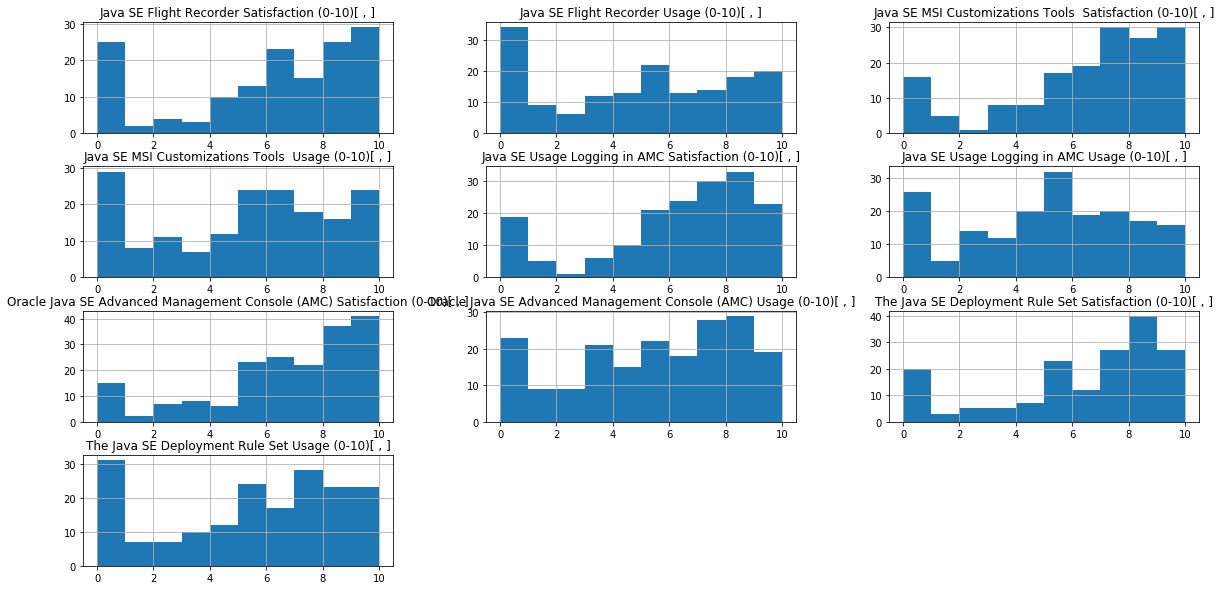

In [46]:
wt_satisf_df.hist()

In [57]:
# scale vars to lie in (-1,1)
x = wt_satisf_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
x_scaled = min_max_scaler.fit_transform(x)
wt_satisf_scaled_df = pd.DataFrame(x_scaled)

In [58]:
wt_satisf_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,193.000000,186.000000,181.000000,172.000000,182.000000,169.000000,173.000000,161.000000,161.000000,149.000000
mean,0.013472,0.251613,-0.060773,0.169767,0.009890,0.201183,-0.026590,0.206211,-0.095652,0.122148
std,0.593739,0.561776,0.573156,0.568587,0.631504,0.605725,0.627646,0.578110,0.652720,0.637441
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.400000,0.000000,-0.400000,0.000000,-0.400000,0.000000,-0.600000,0.000000,-0.800000,-0.200000
50%,0.000000,0.400000,0.000000,0.300000,0.100000,0.400000,0.000000,0.400000,0.000000,0.200000
75%,0.400000,0.600000,0.400000,0.600000,0.550000,0.600000,0.400000,0.600000,0.400000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bfdd550>,
      dtype=object)

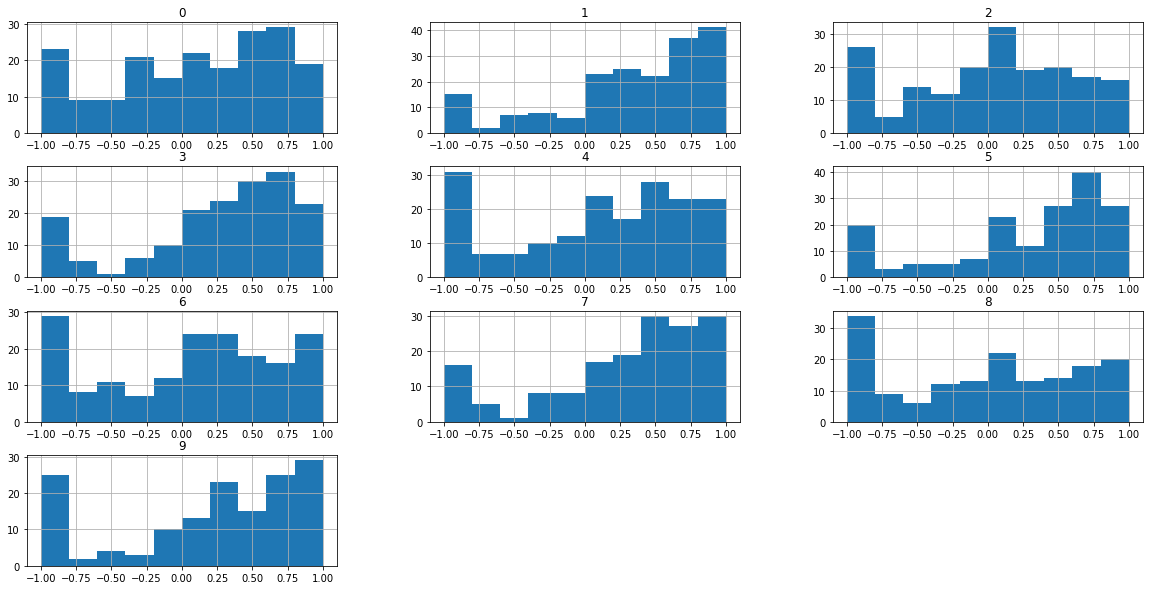

In [59]:
wt_satisf_scaled_df.hist()

In [47]:
wt_satisf_df.columns

Index(['Oracle Java SE Advanced Management Console (AMC) Usage (0-10)[ , ]', 'Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[ , ]', 'Java SE Usage Logging in AMC Usage (0-10)[ , ]', 'Java SE Usage Logging in AMC Satisfaction (0-10)[ , ]', 'The Java SE Deployment Rule Set Usage (0-10)[ , ]', 'The Java SE Deployment Rule Set Satisfaction (0-10)[ , ]', 'Java SE MSI Customizations Tools  Usage (0-10)[ , ]', 'Java SE MSI Customizations Tools  Satisfaction (0-10)[ , ]', 'Java SE Flight Recorder Usage (0-10)[ , ]', 'Java SE Flight Recorder Satisfaction (0-10)[ , ]'], dtype='object')

In [ ]:
wt_satisf_df['Oracle Java SE Advanced Management Console (AMC) U*S]

In [ ]:
# Decision tree play

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



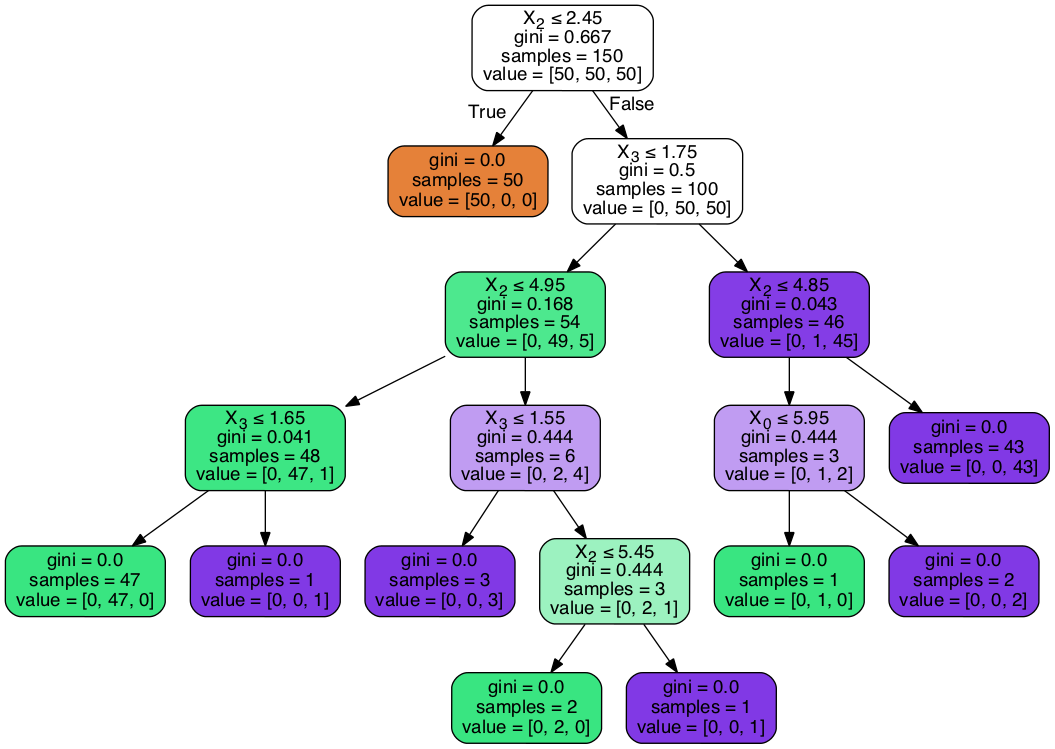

In [96]:
# example via https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [128]:
raw_df.filter(regex='Satisfaction').columns

Index(['Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[ , ]', 'Java SE Usage Logging in AMC Satisfaction (0-10)[ , ]', 'The Java SE Deployment Rule Set Satisfaction (0-10)[ , ]', 'Java SE MSI Customizations Tools  Satisfaction (0-10)[ , ]', 'Java SE Flight Recorder Satisfaction (0-10)[ , ]', 'Oracle’s continued investment in the Java Ecosystem and Technology Satisfaction (0-10)[ , ]', 'Patches and updates for older versions of Java Satisfaction (0-10)[ , ]', 'Tools and updates for desktop management specifically using Java Web Start Satisfaction (0-10)[ , ]', 'Tools and updates for desktop management independently of Java Web Start / Browsers Satisfaction (0-10)[ , ]', 'Access to tools for automated updates and upgrade, desktop deployment rulesets and tools for Java version management  Satisfaction (0-10)[ , ]', 'Monitoring tools Satisfaction (0-10)[ , ]', 'MOS (My Oracle Support) Satisfaction (0-10)[ , ]',
       'Access Cloud Workload and On-premise Satisfaction

In [216]:
# dependent: wt_satisf_df[wt_satisf_df0]
# indepedent: numeric variables from 
#      ind_demog_vars + com_demog_vars + com_java_vars + ind_java_vars 
numerics = ['float64'] #'int16', 'int32', 'int64', 'float16', 'float32', 
print(raw_df.filter(regex='Satisfaction').columns[0])
y = raw_df[raw_df.filter(regex='Satisfaction').columns[0]].replace([12], np.nan).apply(lambda x: x - 1)
X = raw_df[ind_demog_vars + com_demog_vars + com_java_vars + ind_java_vars]#.select_dtypes(include=numerics)

Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[ , ]


In [231]:
X = X.apply(pd.to_numeric, errors='coerce')

In [232]:
X.dtypes

What is your job title?                                                                                                                                                                                                                                                                                                                int64
Which one of the below best describes your company’s industry grouping?                                                                                                                                                                                                                                                                int64
What is the approximate annual revenue of your company?                                                                                                                                                                                                                                                                                int64
A

In [221]:
# col = X['Approximately how many Java developers are in your organization?\xa0']
# pd.DataFrame({'orig':col,
#              'mod': pd.to_numeric(col,errors='coerce')}) 
# can take values like 20-30 and convert to midrange like 25

# X['Approximately how many Java developers are in your organization?\xa0'] = pd.to_numeric(
#     X['Approximately how many Java developers are in your organization?\xa0'] ,errors='coerce')

In [230]:
# Xs = X.filter(regex='What is the approximate distribution of developers')
# col=Xs[Xs.columns[0]]

# pd.DataFrame({'orig':col,
#               'mod': pd.to_numeric(col,errors='coerce')}) 
# can take values like 16% and convert to 16, assuing all responses are in percent as requested

# X.filter(regex='What is the approximate distribution of developers').apply(pd.to_numeric, errors='coerce').describe()



SyntaxError: can't assign to function call (<ipython-input-230-9c3a403d747e>, line 10)

In [233]:
y = y.fillna(y.mean())
X = X.fillna(X.mean())

# y = y.values

# X = X.values

In [235]:
X = X[X.columns[~X.isnull().all()]]
X.isnull().describe()

,What is your job title?,Which one of the below best describes your company’s industry grouping?,What is the approximate annual revenue of your company?,"Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or candidate for political office?",How long has your organization been using Oracle Java SE Subscription for managing your Java applications?,How many Java applications does your organization plan to build or deploy in 2020?,Do you outsource a significant portion of your organization’s application development function?,Approximately how many Java developers are in your organization?,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JVM languages besides Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Python,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JavaScript,Which platform does your organization primarily develop for?,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (RHEL),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Oracle),Please provide approximate percentage(s) for each of the development platforms listed below. Linux Ubuntu,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (SUSE),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Other) *,Please provide approximate percentage(s) for each of the development platforms listed below. MacOS,Please provide approximate percentage(s) for each of the development platforms listed below. Solaris,Please provide approximate percentage(s) for each of the development platforms listed below. Windows,"Eclipse IDE Level of use (0-10) [ , ]","Eclipse IDE Level of satisfaction (0-10)[ , ]","IntelliJ IDE Level of use (0-10) [ , ]","IntelliJ IDE Level of satisfaction (0-10)[ , ]","JDeveloper Level of use (0-10) [ , ]","JDeveloper Level of satisfaction (0-10)[ , ]","NetBeans IDE Level of use (0-10) [ , ]","NetBeans IDE Level of satisfaction (0-10)[ , ]","Rational Application Developer Level of use (0-10) [ , ]","Rational Application Developer Level of satisfaction (0-10)[ , ]","Visual Studio Level of use (0-10) [ , ]","Visual Studio Level of satisfaction (0-10)[ , ]","Other * Level of use (0-10) [ , ]","Other * Level of satisfaction (0-10)[ , ]",Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one)
count,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,22

In [238]:
y.isnull().describe()

count       228
unique        1
top       False
freq        228
Name: Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[ , ], dtype: object

In [243]:
X.describe()

,What is your job title?,Which one of the below best describes your company’s industry grouping?,What is the approximate annual revenue of your company?,"Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or candidate for political office?",How long has your organization been using Oracle Java SE Subscription for managing your Java applications?,How many Java applications does your organization plan to build or deploy in 2020?,Do you outsource a significant portion of your organization’s application development function?,Approximately how many Java developers are in your organization?,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JVM languages besides Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Python,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JavaScript,Which platform does your organization primarily develop for?,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (RHEL),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Oracle),Please provide approximate percentage(s) for each of the development platforms listed below. Linux Ubuntu,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (SUSE),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Other) *,Please provide approximate percentage(s) for each of the development platforms listed below. MacOS,Please provide approximate percentage(s) for each of the development platforms listed below. Solaris,Please provide approximate percentage(s) for each of the development platforms listed below. Windows,"Eclipse IDE Level of use (0-10) [ , ]","Eclipse IDE Level of satisfaction (0-10)[ , ]","IntelliJ IDE Level of use (0-10) [ , ]","IntelliJ IDE Level of satisfaction (0-10)[ , ]","JDeveloper Level of use (0-10) [ , ]","JDeveloper Level of satisfaction (0-10)[ , ]","NetBeans IDE Level of use (0-10) [ , ]","NetBeans IDE Level of satisfaction (0-10)[ , ]","Rational Application Developer Level of use (0-10) [ , ]","Rational Application Developer Level of satisfaction (0-10)[ , ]","Visual Studio Level of use (0-10) [ , ]","Visual Studio Level of satisfaction (0-10)[ , ]","Other * Level of use (0-10) [ , ]","Other * Level of satisfaction (0-10)[ , ]",Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one)
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,3.899123,10.793860,2.434211,1.925439,2.864035,2.864035,1.679825,2381.269912,42.147321,20.537778,27.097778,27.315556,4.802632,26.982906,25.346154,19.520000,7.160000,18.206897,25.797872,4

In [244]:
[x for x in X.columns]

['What is your job title? ',
 'Which one of the below best describes your company’s industry grouping? ',
 'What is the approximate annual revenue of your company? ',
 'Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or candidate for political office?',
 'How long has your organization been using Oracle Java SE Subscription for managing your Java applications? ',
 'How many Java applications does your organization plan to build or deploy in 2020? ',
 'Do you outsource a significant portion of your organization’s application development function? ',
 'Approximately how many Java developers are in your organization?\xa0',
 "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Not

In [247]:
# columns to convert to categorical
cols_to_cat = ['What is your job title? ',
 'Which one of the below best describes your company’s industry grouping? ',
 'What is the approximate annual revenue of your company? ',
 'Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or candidate for political office?',
 'How long has your organization been using Oracle Java SE Subscription for managing your Java applications? ',
 'How many Java applications does your organization plan to build or deploy in 2020? ',
 'Do you outsource a significant portion of your organization’s application development function? ',
 # 'Approximately how many Java developers are in your organization?\xa0',
#  "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Java",
#  "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JVM languages besides Java",
#  "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms       % developing on Python",
#  "What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms   % developing on JavaScript",
 'Which platform does your organization primarily develop for?',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (RHEL)',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (Oracle)',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux Ubuntu',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (SUSE)',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux (Other) *',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  MacOS',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Solaris',
#  'Please provide approximate percentage(s) for each of the development platforms listed below.  Windows',
 'Eclipse IDE Level of use (0-10)\xa0[ , ]',
 'Eclipse IDE Level of satisfaction (0-10)[ , ]',
 'IntelliJ IDE Level of use (0-10)\xa0[ , ]',
 'IntelliJ IDE Level of satisfaction (0-10)[ , ]',
 'JDeveloper Level of use (0-10)\xa0[ , ]',
 'JDeveloper Level of satisfaction (0-10)[ , ]',
 'NetBeans IDE Level of use (0-10)\xa0[ , ]',
 'NetBeans IDE Level of satisfaction (0-10)[ , ]',
 'Rational Application Developer Level of use (0-10)\xa0[ , ]',
 'Rational Application Developer Level of satisfaction (0-10)[ , ]',
 'Visual Studio Level of use (0-10)\xa0[ , ]',
 'Visual Studio Level of satisfaction (0-10)[ , ]',
 'Other * Level of use (0-10)\xa0[ , ]',
 'Other * Level of satisfaction (0-10)[ , ]',
 'Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one)']

# X[cols_to_cat] = X[cols_to_cat].apply(lambda x: x.astype('category'))
X = pd.get_dummies(X)


In [249]:
X.describe()

,Approximately how many Java developers are in your organization?,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JVM languages besides Java,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on Python,What is the approximate distribution of developers primarily developing on the following development platforms (in percentage)? Note: total %'s can be >100 since many orgs use multiple platforms % developing on JavaScript,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (RHEL),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Oracle),Please provide approximate percentage(s) for each of the development platforms listed below. Linux Ubuntu,Please provide approximate percentage(s) for each of the development platforms listed below. Linux (SUSE),Please provide approximate percentage(s) for each of the development platforms listed below. Linux (Other) *,Please provide approximate percentage(s) for each of the development platforms listed below. MacOS,Please provide approximate percentage(s) for each of the development platforms listed below. Solaris,Please provide approximate percentage(s) for each of the development platforms listed below. Windows,What is your job title? _1,What is your job title? _2,What is your job title? _3,What is your job title? _4,What is your job title? _5,What is your job title? _8,Which one of the below best describes your company’s industry grouping? _2,Which one of the below best describes your company’s industry grouping? _5,Which one of the below best describes your company’s industry grouping? _6,Which one of the below best describes your company’s industry grouping? _7,Which one of the below best describes your company’s industry grouping? _8,Which one of the below best describes your company’s industry grouping? _9,Which one of the below best describes your company’s industry grouping? _10,Which one of the below best describes your company’s industry grouping? _11,Which one of the below best describes your company’s industry grouping? _12,Which one of the below best describes your company’s industry grouping? _14,Which one of the below best describes your company’s industry grouping? _15,Which one of the below best describes your company’s industry grouping? _16,Which one of the below best describes your company’s industry grouping? _17,Which one of the below best describes your company’s industry grouping? _18,Which one of the below best describes your company’s industry grouping? _19,Which one of the below best describes your company’s industry grouping? _20,Which one of the below best describes your company’s industry grouping? _21,Which one of the below best describes your company’s industry grouping? _22,Which one of the below best describes your company’s industry grouping? _23,Which one of the below best describes your company’s industry grouping? _25,What is the approximate annual revenue of your company? _1,What is the approximate annual revenue of your company? _2,What is the approximate annual revenue of your company? _3,What is the approximate annual revenue of your company? _4,"Are you an employee or official of a government organization (e.g., federal province, state, locality, public higher education institution, etc.), a government owned or controlled entity (e.g., government-owned utilities, etc.), a public international organization, or a political party or c

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [284]:
dtree=DecisionTreeRegressor(max_leaf_nodes=2, random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=2, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

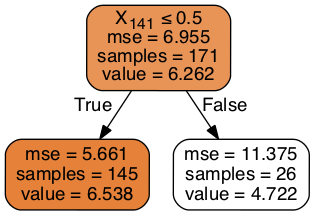

In [285]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [286]:
y_pred = dtree.predict(X_test)
dtree.score(X_test, y_test) # Return the coefficient of determination R^2 of the prediction.
# he best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant
# model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

-0.10328559111352753

In [264]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png("dtree.png") 
# Image(graph.create_png())

True

In [257]:
X.columns[128]

'JDeveloper Level of satisfaction (0-10)[ , ]_1.0'

In [258]:
X.columns[7]

'Please provide approximate percentage(s) for each of the development platforms listed below.  Linux Ubuntu'

In [ ]:
# if they're very satisfied with JDeveloper and doing > 25% on Linux Ubuntu, 
# they are most satisfied with Oracle Java SE Advanced Management Console (AMC)

In [260]:
raw_df.filter(regex='Satisfaction').columns[0]

'Oracle Java SE Advanced Management Console (AMC) Satisfaction (0-10)[\xa0,\xa0]'